In [10]:
from hidromet import config
from hidromet import contornos
from hidromet import utils

import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.pyplot as plt

In [11]:
gdf = gpd.read_file(config.dir_contorno)
gdf.set_crs(epsg=config.epsg_inicial, inplace=True)
bacia = gdf.iloc[0]
nome_bacia = bacia.bacia

arquivo_coords = config.dir_prec_concat.joinpath(f"coords_{nome_bacia}.json")

In [12]:
json_postos = utils.carregar_json(arquivo_coords)

In [13]:
df_postos = gpd.GeoDataFrame(json_postos)

coordenadas = contornos.zipar_coordenadas(latitude=df_postos.latitude, longitude=df_postos.longitude,)
df_postos = df_postos.assign(geometry=coordenadas)
df_postos.set_crs(epsg=config.epsg_inicial, inplace=True)
df_postos = contornos.converter_epsg(df_postos, config.epsg)

df_postos = df_postos.assign(buffer=df_postos.buffer(config.buffer))

In [14]:
df_buffer = contornos.obter_buffer(df_postos, config.buffer)
buffer_dissolvido = contornos.dissolver(df_buffer)

In [15]:
gdf_projetado = contornos.converter_epsg(gdf, config.epsg)
buffer_dissolvido_recortado = contornos.obter_intersecao(contorno=buffer_dissolvido, mascara=gdf_projetado)
buffer_original_recortado = contornos.obter_intersecao(contorno=df_buffer, mascara=gdf_projetado)
representatividade = contornos.calcular_representatividade(buffer_dissolvido_recortado, gdf_projetado)

In [16]:
print(f"A representatividade da bacia é de {representatividade}%")

A representatividade da bacia é de 31.29%


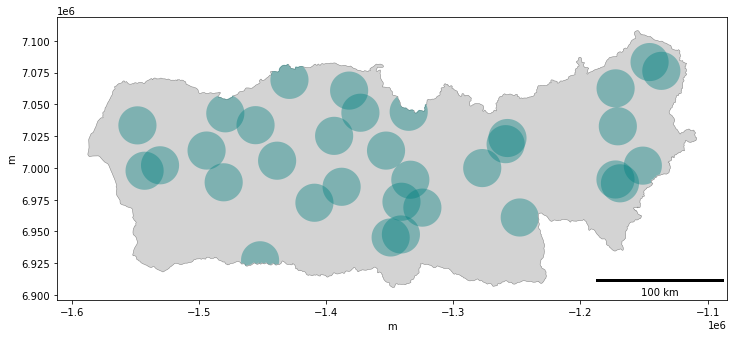

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))

gdf_projetado.plot(ax=ax, facecolor="lightgray", edgecolor='gray', linewidth=0.5)
#buffer_dissolvido_recortado.plot(ax=ax, color="teal", alpha=0.5)
buffer_original_recortado.plot(ax=ax, color="teal", alpha=0.4)
ax.set_ylabel("m")
ax.set_xlabel("m")
ax.add_artist(ScaleBar(1, location = "lower right", loc = "lower right"))